### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly

import dice_ml
from dice_ml import Dice

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns

import matplotlib.pyplot as plt
from causalnex.structure.notears import from_pandas
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

### Loading and Describing Data

In [2]:
df = pd.read_csv('/home/pnans/Documents/3rd Year IISERB/5th Sem/DSE 309: Python/Project/Main Stuff/Data/penguins_lter.csv')
df.head()

studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   

      Island               Stage Individual ID Clutch Completion  Date Egg  \
0  Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/07   
1  Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/07   
2  Torgersen  Adult, 1 Egg Stage          N2A1               Yes  11/16/07   
3  Torgersen  Adult, 1 Egg Stage          N2A2               Yes  11/16/07   
4  Torgersen  Adult, 1 Egg Stage          N3A1               Yes  11/16/07   

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
0                39.1               18.7                181.0         3750.0   
1                39.5               17.4                186.0         3800.0   
2                40.3               18.0                195.0         3250.0   
3                 NaN                NaN                  NaN            NaN   
4                36.7               19.3                193.0         3450.0   

      Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0    MALE                NaN                NaN   
1  FEMALE            8.94956          -24.69454   
2  FEMALE            8.36821          -25.33302   
3     NaN                NaN                NaN   
4  FEMALE            8.76651          -25.32426   

                         Comments  
0  Not enough blood for isotopes.  
1                             NaN  
2                             NaN  
3              Adult not sampled.  
4                             NaN

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  335 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [4]:
df.describe()

Sample Number  Culmen Length (mm)  Culmen Depth (mm)  \
count     344.000000          342.000000         342.000000   
mean       63.151163           43.921930          17.151170   
std        40.430199            5.459584           1.974793   
min         1.000000           32.100000          13.100000   
25%        29.000000           39.225000          15.600000   
50%        58.000000           44.450000          17.300000   
75%        95.250000           48.500000          18.700000   
max       152.000000           59.600000          21.500000   

       Flipper Length (mm)  Body Mass (g)  Delta 15 N (o/oo)  \
count           342.000000     342.000000         330.000000   
mean            200.915205    4201.754386           8.733382   
std              14.061714     801.954536           0.551770   
min             172.000000    2700.000000           7.632200   
25%             190.000000    3550.000000           8.299890   
50%             197.000000    4050.000000           8.652405   
75%             213.000000    4750.000000           9.172123   
max             231.000000    6300.000000          10.025440   

       Delta 13 C (o/oo)  
count         331.000000  
mean          -25.686292  
std             0.793961  
min           -27.018540  
25%           -26.320305  
50%           -25.833520  
75%           -25.062050  
max           -23.787670

In [5]:
df.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                      9
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

### Data Cleansing and Simplification for Visualization

In [6]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:, :] = imputer.fit_transform(df)

df.isnull().sum()

studyName              0
Sample Number          0
Species                0
Region                 0
Island                 0
Stage                  0
Individual ID          0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
Comments               0
dtype: int64

In [7]:
cls = {
"Adelie Penguin (Pygoscelis adeliae)": "darkorange",
"Gentoo penguin (Pygoscelis papua)": "teal",
"Chinstrap penguin (Pygoscelis antarctica)": "mediumorchid",
}

df["colour"] = df["Species"].apply(lambda x: cls[x])

In [8]:
adelie_df = df[df["Species"] == "Adelie Penguin (Pygoscelis adeliae)"].reset_index(drop=True)

In [9]:
adelie_count_df = (pd.DataFrame(adelie_df.groupby(["Species", "colour"])["studyName"].count()).sort_values("studyName", ascending=False).reset_index().rename(columns={"studyName": "Count"}))
adelie_count_df

Species      colour  Count
0  Adelie Penguin (Pygoscelis adeliae)  darkorange    152

In [10]:
gentoo_df = df[df["Species"] == "Gentoo penguin (Pygoscelis papua)"].reset_index(drop=True)

In [11]:
gentoo_count_df = (pd.DataFrame(gentoo_df.groupby(["Species", "colour"])["studyName"].count()).sort_values("studyName", ascending=False).reset_index().rename(columns={"studyName": "Count"}))
gentoo_count_df

Species colour  Count
0  Gentoo penguin (Pygoscelis papua)   teal    124

In [12]:
chinstrap_df = df[df["Species"] == "Chinstrap penguin (Pygoscelis antarctica)"].reset_index(drop=True)

In [13]:
chinstrap_count_df = (pd.DataFrame(chinstrap_df.groupby(["Species", "colour"])["studyName"].count()).sort_values("studyName", ascending=False).reset_index().rename(columns={"studyName": "Count"}))
chinstrap_count_df

Species        colour  Count
0  Chinstrap penguin (Pygoscelis antarctica)  mediumorchid     68

In [14]:
female_df = (pd.DataFrame(df[df["Sex"] == "FEMALE"][["Species", "Sex", "colour"]].groupby("Species")["Sex"].count()).sort_values("Sex", ascending=False).reset_index().rename(columns={"Sex": "Female"}))
female_df

Species  Female
0        Adelie Penguin (Pygoscelis adeliae)      73
1          Gentoo penguin (Pygoscelis papua)      59
2  Chinstrap penguin (Pygoscelis antarctica)      34

In [15]:
male_df = (pd.DataFrame(df[df["Sex"] == "MALE"][["Species", "Sex"]].groupby("Species")["Sex"].count()).sort_values("Sex", ascending=False).reset_index().rename(columns={"Sex": "Male"}))
male_df

Species  Male
0        Adelie Penguin (Pygoscelis adeliae)    79
1          Gentoo penguin (Pygoscelis papua)    65
2  Chinstrap penguin (Pygoscelis antarctica)    34

### Data Visualization

In [16]:
# Culmen Length (mm) vs. Body Mass (g)
trace1 = go.Scatter(
x=adelie_df["Culmen Length (mm)"],
y=adelie_df["Body Mass (g)"],
text=adelie_df["Species"],
mode="markers",
marker=dict(size=10, symbol="circle", line=dict(color="rgb(0,0,0)", width=0.5)),
marker_color=adelie_df["colour"],
name="Adelie Penguin",
)
trace2 = go.Scatter(
x=gentoo_df["Culmen Length (mm)"],
y=gentoo_df["Body Mass (g)"],
text=gentoo_df["Species"],
mode="markers",
marker=dict(size=10, symbol="square", line=dict(color="rgb(0,0,0)", width=0.5)),
marker_color=gentoo_df["colour"],
name="Gentoo penguin",
)
trace3 = go.Scatter(
x=chinstrap_df["Culmen Length (mm)"],
y=chinstrap_df["Body Mass (g)"],
text=chinstrap_df["Species"],
mode="markers",
marker=dict(
size=12, symbol="triangle-up", line=dict(color="rgb(0,0,0)", width=0.5)
),
marker_color=chinstrap_df["colour"],
name="Chinstrap penguin",
)
data = [trace1, trace2, trace3]
layout = dict(
title="<b>Culmen Length (mm) vs. Body Mass (g)</b>",
showlegend=True,
xaxis=dict(title="Culmen Length (mm)"),
yaxis=dict(title="Body Mass (g)"),
plot_bgcolor="rgba(0,0,0,0)",
paper_bgcolor="rgba(0,0,0,0)",
)
fig = dict(data=data, layout=layout)
iplot(fig)

In [17]:
# Flipper Length (mm) vs. Body Mass (g)
trace1 = go.Scatter(
x=adelie_df["Flipper Length (mm)"],
y=adelie_df["Body Mass (g)"],
text=adelie_df["Species"],
mode="markers",
marker=dict(size=9, symbol="circle", line=dict(color="rgb(0,0,0)", width=0.5)),
marker_color=adelie_df["colour"],
name="Adelie Penguin",
)
trace2 = go.Scatter(
x=gentoo_df["Flipper Length (mm)"],
y=gentoo_df["Body Mass (g)"],
text=gentoo_df["Species"],
mode="markers",
marker=dict(size=9, symbol="square", line=dict(color="rgb(0,0,0)", width=0.5)),
marker_color=gentoo_df["colour"],
name="Gentoo penguin",
)
trace3 = go.Scatter(
x=chinstrap_df["Flipper Length (mm)"],
y=chinstrap_df["Body Mass (g)"],
text=chinstrap_df["Species"],
mode="markers",
marker=dict(
size=11, symbol="triangle-up", line=dict(color="rgb(0,0,0)", width=0.5)
),
marker_color=chinstrap_df["colour"],
name="Chinstrap penguin",
)
data = [trace1, trace2, trace3]
layout = dict(
title="<b>Flipper Length (mm) vs. Body Mass (g)</b>",
showlegend=True,
xaxis=dict(title="Flipper Length (mm)"),
yaxis=dict(title="Body Mass (g)"),
plot_bgcolor="rgba(0,0,0,0)",
paper_bgcolor="rgba(0,0,0,0)",
)
fig = dict(data=data, layout=layout)
iplot(fig)


In [18]:
# Flipper Length Distributions
trace1 = go.Violin(
x=adelie_df["Species"],
y=adelie_df["Flipper Length (mm)"],
box_visible=True,
meanline_visible=True,
points="all",
line_color="darkorange",
name="Adelie Penguin",
)
trace2 = go.Violin(
x=gentoo_df["Species"],
y=gentoo_df["Flipper Length (mm)"],
box_visible=True,
meanline_visible=True,
line_color="teal",
points="all",
name="Gentoo penguin",
)
trace3 = go.Violin(
x=chinstrap_df["Species"],
y=chinstrap_df["Flipper Length (mm)"],
points="all",
box_visible=True,
meanline_visible=True,
line_color="mediumorchid",
name="Chinstrap penguin",
)
data = [trace1, trace2, trace3]
layout = dict(
title="<b>Flipper Length (mm) Distribution for the 3 Species</b>",
showlegend=True,
xaxis=dict(title="Penguin Species"),
yaxis=dict(title="Flipper Length (mm)"),
plot_bgcolor="rgba(0,0,0,0)",
paper_bgcolor="rgba(0,0,0,0)",
)
fig = dict(data=data, layout=layout)
iplot(fig)

### Data Manipulation for Processing

In [19]:
df.drop(['studyName','Individual ID','Region','Date Egg', 'Comments','Delta 15 N (o/oo)','Delta 13 C (o/oo)', 'Stage', 'colour','Sample Number'], axis =1, inplace = True)
df

Species     Island Clutch Completion  \
0    Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   
1    Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   
2    Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   
3    Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   
4    Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   
..                                   ...        ...               ...   
339    Gentoo penguin (Pygoscelis papua)     Biscoe                No   
340    Gentoo penguin (Pygoscelis papua)     Biscoe               Yes   
341    Gentoo penguin (Pygoscelis papua)     Biscoe               Yes   
342    Gentoo penguin (Pygoscelis papua)     Biscoe               Yes   
343    Gentoo penguin (Pygoscelis papua)     Biscoe               Yes   

     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0                  39.1               18.7                181.0   
1                  39.5               17.4                186.0   
2                  40.3               18.0                195.0   
3                  41.1               17.0                190.0   
4                  36.7               19.3                193.0   
..                  ...                ...                  ...   
339                41.1               17.0                190.0   
340                46.8               14.3                215.0   
341                50.4               15.7                222.0   
342                45.2               14.8                212.0   
343                49.9               16.1                213.0   

     Body Mass (g)     Sex  
0           3750.0    MALE  
1           3800.0  FEMALE  
2           3250.0  FEMALE  
3           3800.0    MALE  
4           3450.0  FEMALE  
..             ...     ...  
339         3800.0    MALE  
340         4850.0  FEMALE  
341         5750.0    MALE  
342         5200.0  FEMALE  
343         5400.0    MALE  

[344 rows x 8 columns]

In [20]:
df.replace(to_replace='Adelie Penguin (Pygoscelis adeliae)', value=0, inplace=True, limit=None, regex=False, method='pad')
df.replace(to_replace='Chinstrap penguin (Pygoscelis antarctica)', value=1, inplace=True, limit=None, regex=False, method='pad')
df.replace(to_replace='Gentoo penguin (Pygoscelis papua)', value=2, inplace=True, limit=None, regex=False, method='pad')

# Adelie: 0, Chinstrap: 1, Gentoo: 2

In [21]:
df.replace(to_replace='Torgersen', value=0, inplace=True, limit=None, regex=False, method='pad')
df.replace(to_replace='Biscoe', value=1, inplace=True, limit=None, regex=False, method='pad')
df.replace(to_replace='Dream', value=2, inplace=True, limit=None, regex=False, method='pad')

# Torgersen: 0, Biscoe: 1, Dream: 2

In [22]:
df.replace(to_replace='No', value=0, inplace=True, limit=None, regex=False, method='pad')
df.replace(to_replace='Yes', value=1, inplace=True, limit=None, regex=False, method='pad')

# Yes: 1, No: 0

In [23]:
df.replace(to_replace='FEMALE', value=0, inplace=True, limit=None, regex=False, method='pad')
df.replace(to_replace='MALE', value=1, inplace=True, limit=None, regex=False, method='pad')

# FEMALE: 0, MALE: 1

In [24]:
df = df.dropna()
df

Species  Island  Clutch Completion  Culmen Length (mm)  \
0          0       0                  1                39.1   
1          0       0                  1                39.5   
2          0       0                  1                40.3   
3          0       0                  1                41.1   
4          0       0                  1                36.7   
..       ...     ...                ...                 ...   
339        2       1                  0                41.1   
340        2       1                  1                46.8   
341        2       1                  1                50.4   
342        2       1                  1                45.2   
343        2       1                  1                49.9   

     Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  Sex  
0                 18.7                181.0         3750.0    1  
1                 17.4                186.0         3800.0    0  
2                 18.0                195.0         3250.0    0  
3                 17.0                190.0         3800.0    1  
4                 19.3                193.0         3450.0    0  
..                 ...                  ...            ...  ...  
339               17.0                190.0         3800.0    1  
340               14.3                215.0         4850.0    0  
341               15.7                222.0         5750.0    1  
342               14.8                212.0         5200.0    0  
343               16.1                213.0         5400.0    1  

[344 rows x 8 columns]

### Visualizing Factuals

/home/pnans/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/home/pnans/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



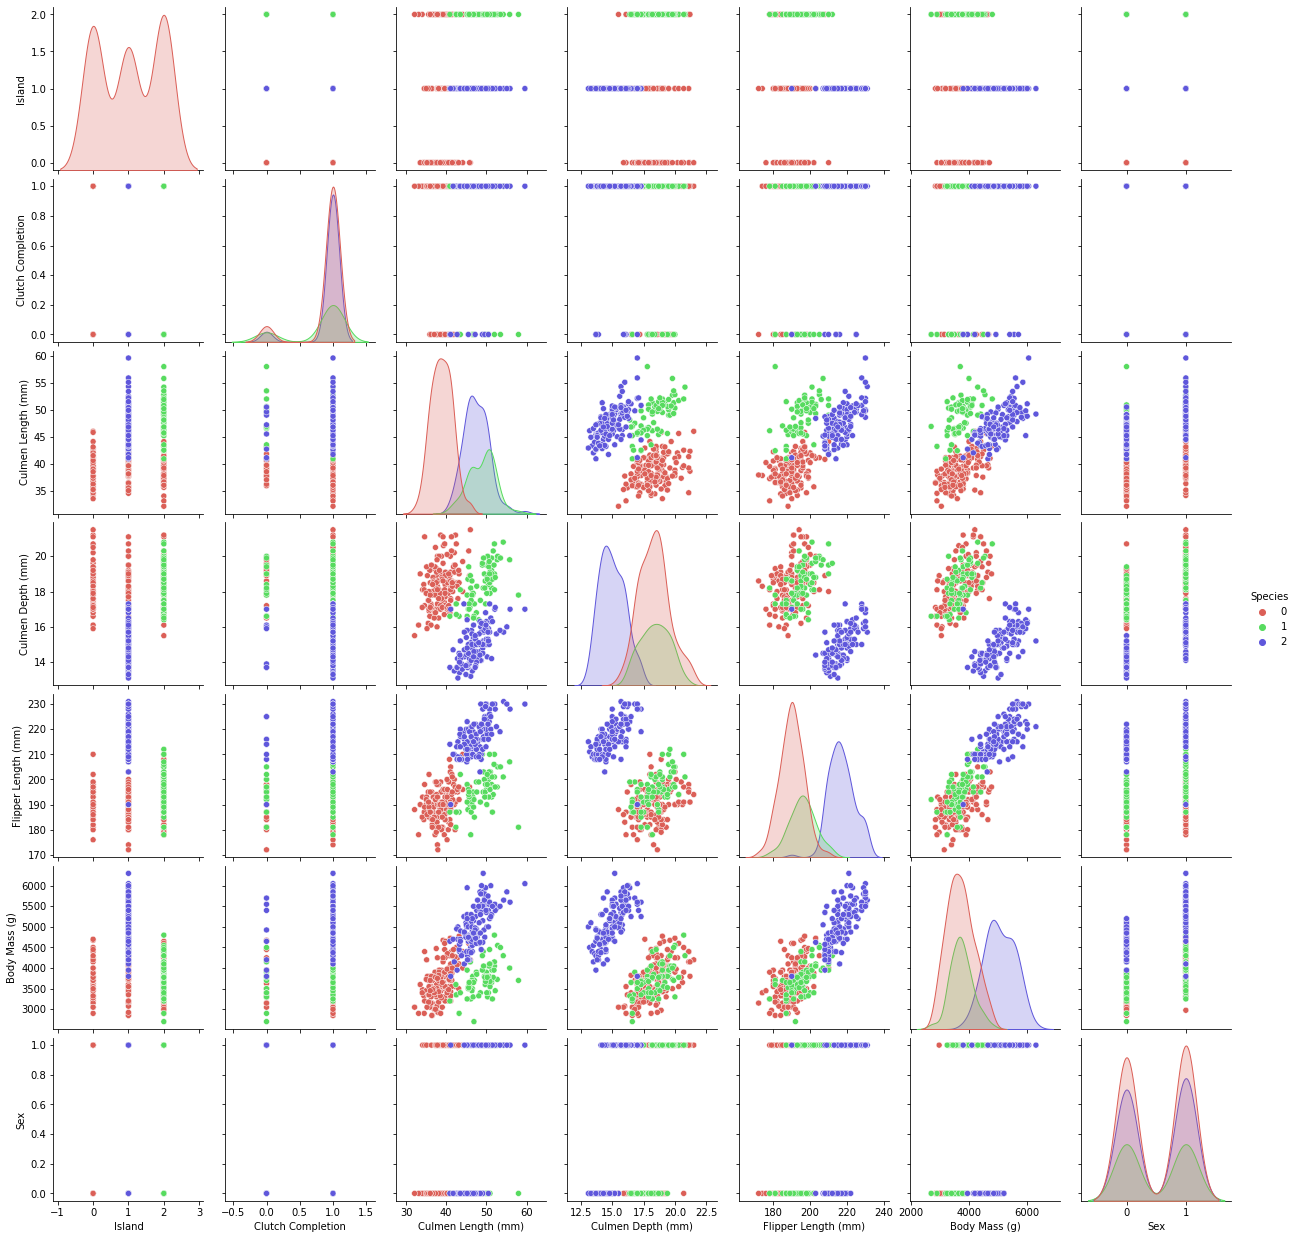

In [25]:
sns.pairplot(data=df, hue='Species', palette=sns.color_palette(palette='hls' ,n_colors=3))

Text(0.5, 1.0, 'Correlation heatmap')

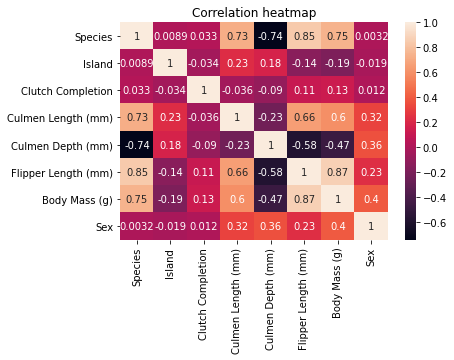

In [26]:
corr = df.corr()
sns.heatmap(data=corr, annot=True)
plt.title('Correlation heatmap')

### Model Formation

In [27]:
outcome_name = "Species"
continuous_features_penguins = df.drop(outcome_name, axis=1).columns.tolist()
target = df[outcome_name]     

In [28]:
datasetX = df.drop(outcome_name, axis=1)
x_train, x_test, y_train, y_test = train_test_split(datasetX,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=target)

categorical_features = x_train.columns.difference(continuous_features_penguins)

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

transformations = ColumnTransformer(
    transformers=[('num', numeric_transformer, continuous_features_penguins),
                  ('cat', categorical_transformer, categorical_features)])

clf = Pipeline(steps=[('preprocessor', transformations),
                      ('classifier', RandomForestClassifier())])
model = clf.fit(x_train, y_train)

### DiCE-ML Implementation

In [29]:
data = dice_ml.Data(dataframe=df,
                      continuous_features=continuous_features_penguins,
                      outcome_name=outcome_name)

# We provide the type of model as a parameter (model_type)
m_penguins = dice_ml.Model(model=model, backend="sklearn", model_type='classifier')

In [30]:
exp_genetic_penguins = Dice(data, m_penguins, method="genetic")
df_cf = pd.DataFrame()

In [31]:
for i in range(110):
    e1 = exp_genetic_penguins.generate_counterfactuals(x_train[i:i+1], total_CFs= 1, desired_class= 0)
    temp_df = e1.cf_examples_list[0].final_cfs_df
    df_cf = df_cf.append(temp_df)

  0%|                                                     | 0/1 [00:00<?, ?it/s]WARNING:root: MAD for feature Clutch Completion is 0, so replacing it with 1.0 to avoid error.


  0%|                                                     | 0/1 [00:00<?, ?it/s]WARNING:root: MAD for feature Clutch Completion is 0, so replacing it with 1.0 to avoid error.


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.80it/s]


  0%|                                                     | 0/1 [00:00<?, ?it/s]WARNING:root: MAD for feature Clutch Completion is 0, so replacing it with 1.0 to avoid error.


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.89it/s]


In [32]:
for i in range(110,220):
    e2 = exp_genetic_penguins.generate_counterfactuals(x_train[i:i+1], total_CFs= 1, desired_class= 1)
    temp_df = e2.cf_examples_list[0].final_cfs_df
    df_cf = df_cf.append(temp_df)

  0%|                                                     | 0/1 [00:00<?, ?it/s]WARNING:root: MAD for feature Clutch Completion is 0, so replacing it with 1.0 to avoid error.


  0%|                                                     | 0/1 [00:00<?, ?it/s]WARNING:root: MAD for feature Clutch Completion is 0, so replacing it with 1.0 to avoid error.


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.17s/it]


  0%|                                                     | 0/1 [00:00<?, ?it/s]WARNING:root: MAD for feature Clutch Completion is 0, so replacing it with 1.0 to avoid error.


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.27s/it]


In [33]:
for i in range(220,330):
    e3 = exp_genetic_penguins.generate_counterfactuals(x_train[i:i+1], total_CFs= 1, desired_class= 2)
    temp_df = e3.cf_examples_list[0].final_cfs_df
    df_cf = df_cf.append(temp_df)

  0%|                                                     | 0/1 [00:00<?, ?it/s]WARNING:root: MAD for feature Clutch Completion is 0, so replacing it with 1.0 to avoid error.


  0%|                                                     | 0/1 [00:00<?, ?it/s]WARNING:root: MAD for feature Clutch Completion is 0, so replacing it with 1.0 to avoid error.


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.28it/s]
0it [00:00, ?it/s]


IndexError: list index out of range

### Visualizing Counterfactuals

In [34]:
df_cf

Island  Clutch Completion  Culmen Length (mm)  Culmen Depth (mm)  \
0      1.0                1.0                40.8               16.1   
0      0.0                1.0                41.0               20.0   
0      0.0                0.0                37.7               19.8   
0      0.0                1.0                34.4               18.4   
0      1.0                1.0                32.7               17.9   
..     ...                ...                 ...                ...   
0      1.0                1.0                49.8               13.5   
0      0.0                0.0                50.5               18.9   
0      2.0                1.0                48.5               14.1   
0      2.0                0.0                38.2               15.0   
0      1.0                0.0                56.1               14.0   

    Flipper Length (mm)  Body Mass (g)  Sex  Species  
0                 191.7         5347.8  0.0        0  
0                 203.0         4725.0  1.0        0  
0                 198.0         3500.0  1.0        0  
0                 184.0         3325.0  0.0        0  
0                 209.3         5707.5  1.0        0  
..                  ...            ...  ...      ...  
0                 178.9         4936.9  0.0        2  
0                 213.2         5031.3  0.0        2  
0                 220.0         5300.0  1.0        2  
0                 220.9         5069.4  1.0        2  
0                 228.7         6033.3  0.0        2  

[263 rows x 8 columns]

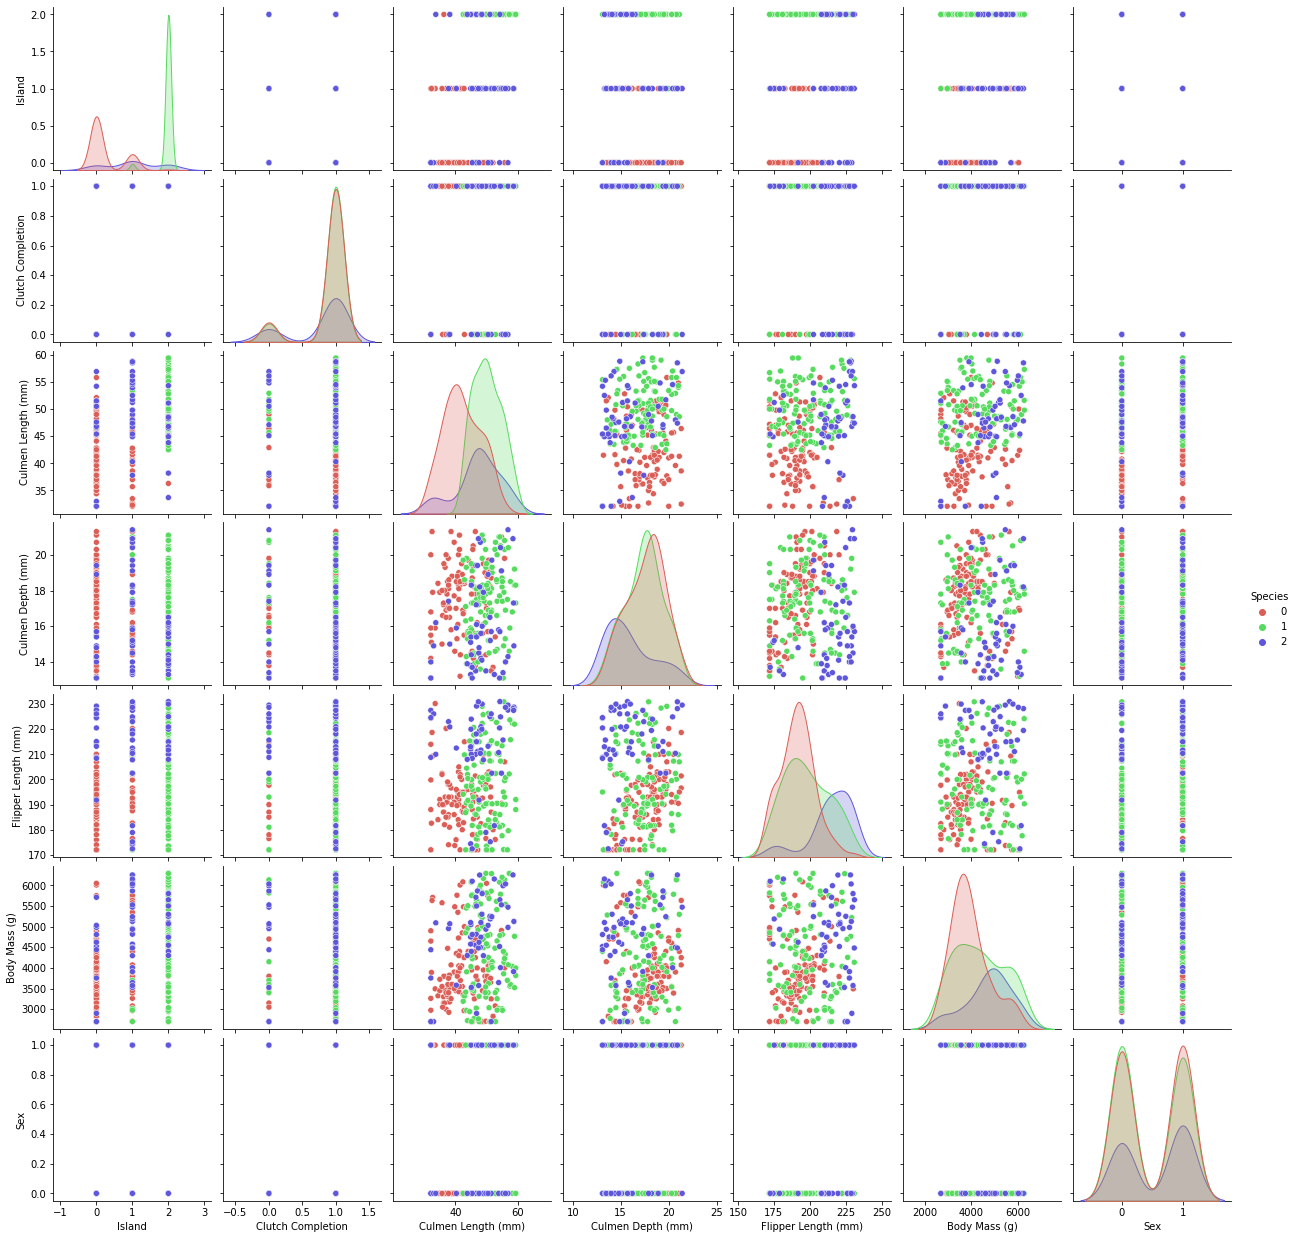

In [35]:
sns.pairplot(data=df_cf, hue='Species', palette=sns.color_palette(palette='hls' ,n_colors=3))

Text(0.5, 1.0, 'Correlation heatmap')

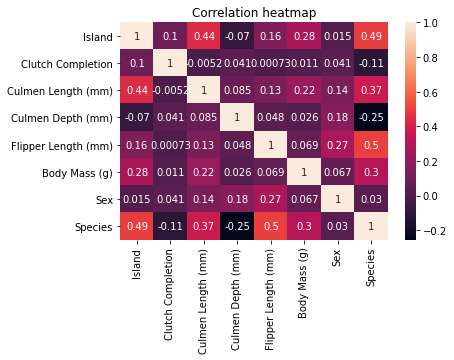

In [36]:
corr = df_cf.corr()
sns.heatmap(data=corr, annot=True)
plt.title('Correlation heatmap')

### Causal Inference of Factual Data

In [37]:
sm = from_pandas(df)

/home/pnans/.local/lib/python3.8/site-packages/causalnex/structure/notears.py:395: RuntimeWarning:

overflow encountered in double_scalars

/home/pnans/.local/lib/python3.8/site-packages/causalnex/structure/notears.py:411: RuntimeWarning:

overflow encountered in multiply

/home/pnans/.local/lib/python3.8/site-packages/causalnex/structure/notears.py:411: RuntimeWarning:

invalid value encountered in multiply

/home/pnans/.local/lib/python3.8/site-packages/causalnex/structure/notears.py:440: UserWarning:

Failed to converge. Consider increasing max_iter.



/home/pnans/.local/lib/python3.8/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning:





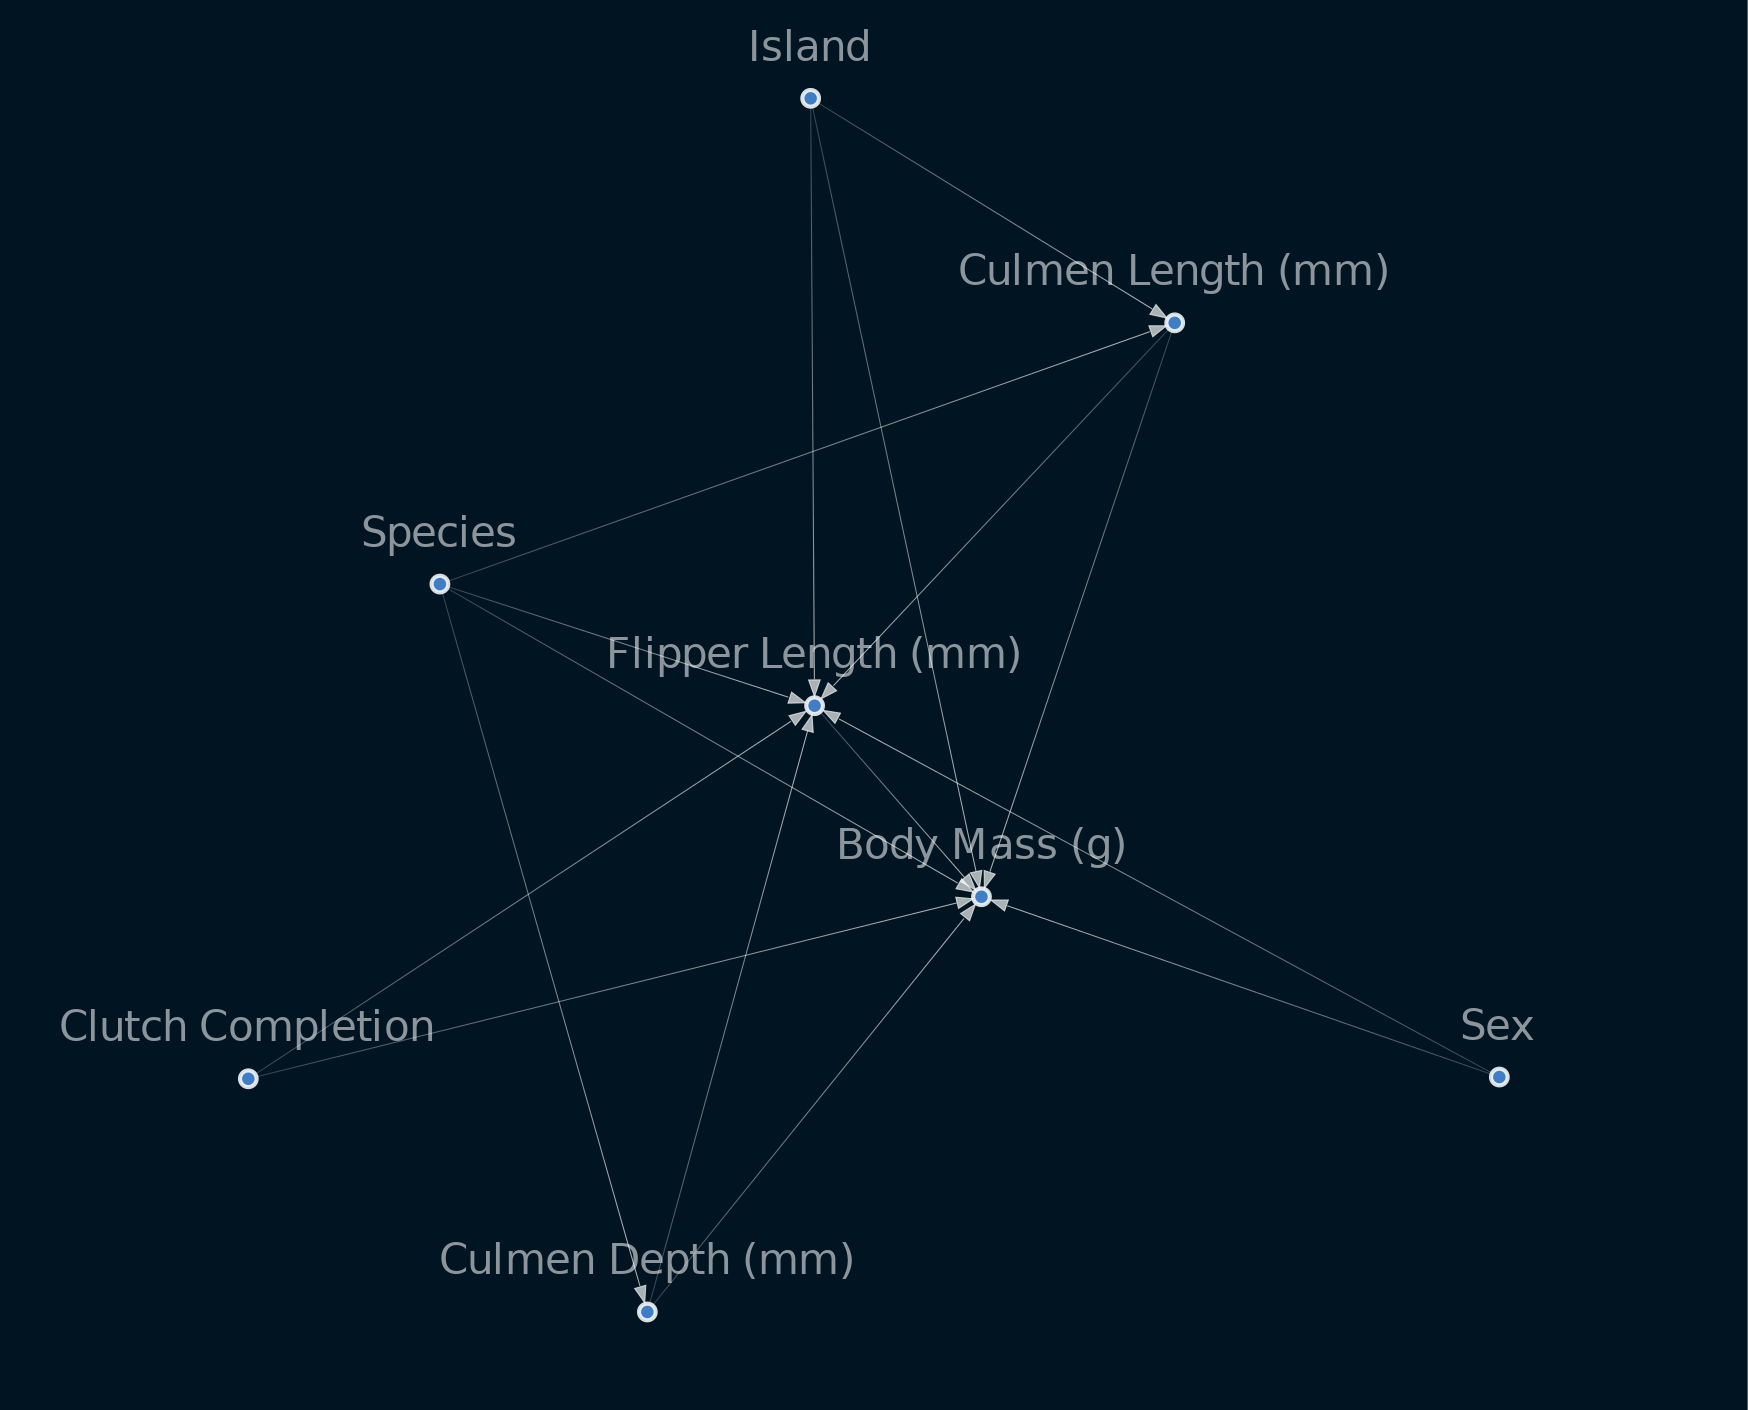

In [38]:
sm.remove_edges_below_threshold(1.0)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "2.0"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

### Causal Inference of Counterfactual Data

In [39]:
sm = from_pandas(df_cf)

/home/pnans/.local/lib/python3.8/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning:





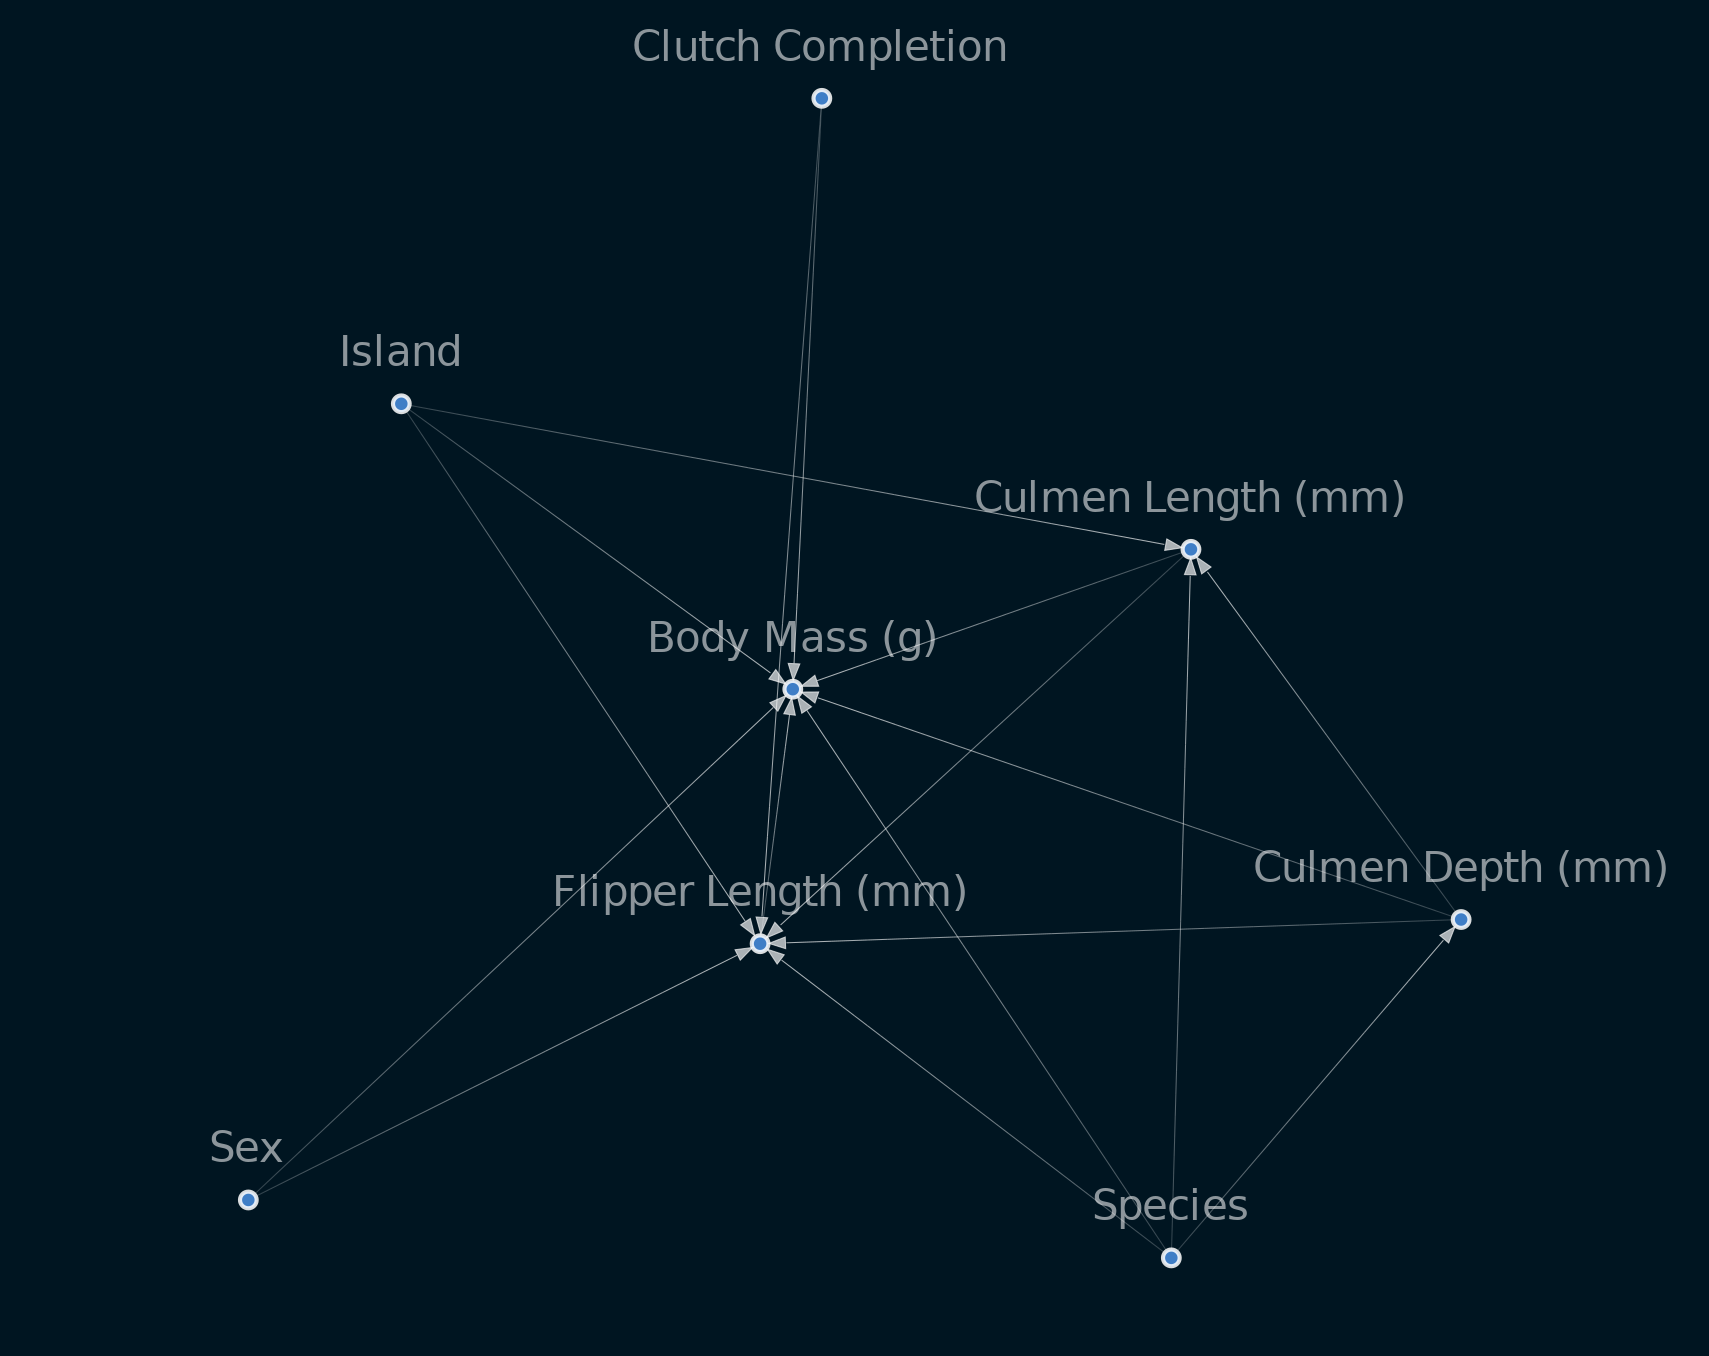

In [40]:
sm.remove_edges_below_threshold(1.0)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "2.0"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))